## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Codification  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('gameInfosTreated.xlsx')

df

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


### Tests

In [3]:
# genre title 

df1 = df.drop_duplicates('title', keep='first')
df2 = df.drop_duplicates('title', keep='last')

display(df1, df2)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
5,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,1 Player,Action Adventure
8,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,1-2,Action
14,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,Action
...,...,...,...,...,...,...,...,...,...,...
64534,SPOGS RACING,07/07/2008,Wii,18,7,3.7,22,Pronto Games,1-2 Player(s),Driving
64538,DOUBLE DRAGON II: WANDER OF THE DRAGONS,04/05/2013,Xbox 360,17,19,1.6,59,Gravity Corporation,1-2 Player(s),Action
64541,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Sports
64549,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Driving


,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
16,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,3D
19,SUPER MARIO GALAXY 2,05/23/2010,Wii,97,87,9.1,2942,Nintendo EAD Tokyo,No Online Multiplayer,3D
54,METROID PRIME,11/17/2002,GameCube,97,70,8.9,1402,Retro Studios,1 Player,Sci-Fi
59,SUPER MARIO ODYSSEY,10/27/2017,Switch,97,113,8.9,7165,Nintendo,No Online Multiplayer,3D
...,...,...,...,...,...,...,...,...,...,...
64543,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Biking
64548,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Modern
64552,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Automobile
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General


In [56]:
# taking sample

#df1 = df1.groupby('genre_split').apply(lambda x: x.sample(n=10, replace='False'))

df1 = df1.groupby('plataform').sample(n=25, replace='False')

In [24]:
# df1 = df1.reset_index()

In [25]:
'''series = df1['genre_split'].value_counts().head(20)

genre_list = series.index.to_list()
genre_list'''

"series = df2['genre_split'].value_counts().head(20)\n\ngenre_list = series.index.to_list()\ngenre_list"

In [26]:
'''display(df1[~df1['genre_split'].isin(genre_list)])

df1[~df1['genre_split'].isin(genre_list)]'''

"display(df2[~df2['genre_split'].isin(genre_list)])\n\ndf2[~df2['genre_split'].isin(genre_list)]"

In [27]:
#df1 = df1[(df1['metascore'] < 95) & (df1['metascore'] > 70)]

In [28]:
#df1 = df1.drop_duplicates(subset='title', keep='first')

In [29]:
#df1.sort_values(by='title')

In [57]:
display(df1.tail(20))

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
55180,DUNGEONS & DRAGONS: DARK ALLIANCE,06/22/2021,Xbox Series X,58,17,4.7,46,Tuque Games,Up to 5,Role-Playing
7865,MARVEL'S GUARDIANS OF THE GALAXY,10/26/2021,Xbox Series X,84,26,8.7,421,Eidos Montreal,No Online Multiplayer,Role-Playing
21366,IN SOUND MIND,09/28/2021,Xbox Series X,78,9,6.9,7,We Create Stuff,No Online Multiplayer,Adventure
33906,SOULSTICE,09/20/2022,Xbox Series X,72,17,3.5,53,Reply Game Studios,No Online Multiplayer,Role-Playing
20545,OUTRIDERS WORLDSLAYER,06/30/2022,Xbox Series X,78,9,6.3,4,People Can Fly,Up to 3,Action
30105,CALL OF DUTY: VANGUARD,11/05/2021,Xbox Series X,74,15,5.0,260,Sledgehammer Games,Up to more than 64,Action
40071,MADDEN NFL 23,08/16/2022,Xbox Series X,70,22,1.8,93,EA Sports,Up to 6,Sports
23933,SUPER MONKEY BALL: BANANA MANIA,10/05/2021,Xbox Series X,77,16,7.5,6,Sega,1-2 Player(s),Miscellaneous
18529,RIDERS REPUBLIC,10/28/2021,Xbox Series X,79,25,6.3,37,Ubisoft,1-2 Player(s),Sports
28806,MONSTER ENERGY SUPERCROSS - THE OFFICIAL VIDEO...,03/14/2022,Xbox Series X,75,7,1.0,7,Milestone S.r.l,Up to 12,Racing


## Droping columns

In [58]:
df1 = df1.drop(['release', 'players_number'], axis=1)

display(df1)
print(df1.shape)

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
23049,AZURE STRIKER GUNVOLT,3DS,77,20,8.1,83,Inti Creates,Action
1746,SUPER MARIO 3D LAND,3DS,90,82,8.4,1391,Nintendo,Action
53587,JAMES NOIR'S HOLLYWOOD CRIMES,3DS,60,22,6.6,7,Ubisoft,Miscellaneous
40465,RIVER CITY: TOKYO RUMBLE,3DS,69,16,7.2,19,Million,Action
3692,POKEMON X,3DS,87,71,7.5,1510,Game Freak,Role-Playing
...,...,...,...,...,...,...,...,...
39124,MADDEN NFL 22,Xbox Series X,70,21,0.6,333,EA Tiburon,Sports
8912,SUBNAUTICA: BELOW ZERO,Xbox Series X,83,12,7.8,55,Unknown Worlds Entertainment,Adventure
40071,MADDEN NFL 23,Xbox Series X,70,22,1.8,93,EA Sports,Sports
1456,ROGUE LEGACY 2,Xbox Series X,90,16,7.8,38,Cellar Door Games,Action


(550, 8)


## Codification

In [59]:
le_title = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df1['title'] = le_title.fit_transform(df1['title'])

In [60]:
le_genre = LabelEncoder()

# Aplicating the ding in column "genre_split"
df1['genre_split'] = le_genre.fit_transform(df1['genre_split'])

In [61]:
'''le_release = LabelEncoder()

# Aplicating the LabelEncoding in column "release"
df1['release'] = le_release.fit_transform(df1['release'])'''

'le_release = LabelEncoder()\n\n# Aplicating the LabelEncoding in column "release"\ndf1[\'release\'] = le_release.fit_transform(df1[\'release\'])'

In [62]:
le_plat = LabelEncoder()

# Aplicating the LabelEncoding in column "plataform"
df1['plataform'] = le_plat.fit_transform(df1['plataform'])

In [63]:
le_developer = LabelEncoder()

# Aplicating the LabelEncoding in column "developer"
df1['developer'] = le_developer.fit_transform(df1['developer'])

In [64]:
df1

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
23049,29,0,77,20,8.1,83,151,0
1746,417,0,90,82,8.4,1391,212,0
53587,210,0,60,22,6.6,7,323,10
40465,356,0,69,16,7.2,19,193,0
3692,331,0,87,71,7.5,1510,111,14
...,...,...,...,...,...,...,...,...
39124,234,21,70,21,0.6,333,87,17
8912,413,21,83,12,7.8,55,328,3
40071,235,21,70,22,1.8,93,86,17
1456,360,21,90,16,7.8,38,59,0


## Convert to original format

In [65]:
#df1['plataform'] = le_plat.inverse_transform(df1['plataform'])
#df1['developer'] = le_developer.inverse_transform(df1['developer'])

In [66]:
df1

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
23049,29,0,77,20,8.1,83,151,0
1746,417,0,90,82,8.4,1391,212,0
53587,210,0,60,22,6.6,7,323,10
40465,356,0,69,16,7.2,19,193,0
3692,331,0,87,71,7.5,1510,111,14
...,...,...,...,...,...,...,...,...
39124,234,21,70,21,0.6,333,87,17
8912,413,21,83,12,7.8,55,328,3
40071,235,21,70,22,1.8,93,86,17
1456,360,21,90,16,7.8,38,59,0


# Train

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('metascore', axis=1), df1['metascore'], test_size=0.25)

## KNN model

In [68]:
'''knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = knn.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = knn.score(X_test, y_pred)
print("Accuracy:", accuracy)'''

'knn = KNeighborsClassifier(n_neighbors=3)\n\n# Treinando o modelo\nknn.fit(X_train, y_train)\n\n# Realizando as previsões com os dados de teste\ny_pred = knn.predict(X_test)\n\n# Avaliando a acurácia do modelo\naccuracy = knn.score(X_test, y_pred)\nprint("Accuracy:", accuracy)'

## Linear Regression

In [69]:
# instanciar o modelo de Regressão Linear
regressor = LinearRegression()

# treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

# fazer previsões com os dados de teste
y_pred_lr = regressor.predict(X_test)

In [70]:
mae = mean_absolute_error(y_test, y_pred_lr)

print("MAE: ", mae)

MAE:  8.202806955759574


## Random Forest

In [71]:
# Create a model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the model with training data
clf.fit(X_train, y_train)

# Make predictions using test data
y_pred_rf = clf.predict(X_test)

In [72]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred_rf)

print("Acurácia:", round(accuracy,4))


import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred_rf))

Acurácia: 0.2029


12.54528030659397

In [73]:
# Precion

precision = precision_score(y_test, y_pred_rf, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.1486


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier

In [74]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [75]:
# Accuracy 

acc_dtc = accuracy_score(y_test, y_pred)

print('Accuracy:', round(acc_dtc,4))

Accuracy: 0.1957


In [76]:
# Precision

precision = precision_score(y_test, y_pred, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.1202


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Graphs

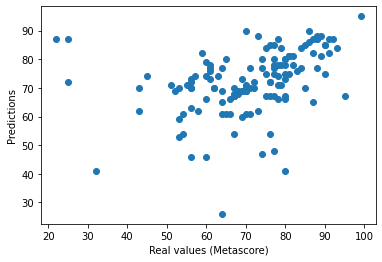

In [77]:
# Suponha que você tenha as seguintes variáveis:
# real_values: as respostas reais (notas do Metascore)
# predictions: as previsões feitas pelo modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()

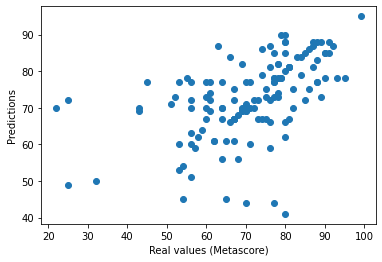

In [78]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()